# Notebook Imports


In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

plt.style.use("ggplot")

# Reading Data

In [49]:
df = pd.read_csv("cleaned_data.csv", index_col=0)
df = df.drop(columns=["title"])
df.head()

,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,intense_violence,...,sexual_content,sexual_themes,simulated_gambling,strong_language,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
1,1,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,ET
2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,M
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,ET
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,T


# Splitting Dataset


In [50]:
encoding = {"E": 0, "ET": 1, "T": 2, "M": 3}
df.esrb_rating = df.esrb_rating.replace(encoding)

In [51]:
train, val = train_test_split(df, test_size=0.2)


# Data Cleaning

In our data we have a lot of explanatory variables, some of which are possibly not highly correlated with the explanatory variable, and hence would end up causing bias in our bias
 

For this reason, we can remove the variables which are not correlated with the explanatory variable. 

The following cells lists down the variables sorted in ascending order of absolute value of correlation with esrb_rating

In [52]:
# train.corr().esrb_rating.sort_values(key= lambda x: abs(x))

We remove the variables with abs(correlation) < 0.2

In [53]:
# columns_to_drop = train.columns[
#     train.corr().esrb_rating.sort_values(key=lambda x: abs(x)) < 0.15
# ]

# train = train.drop(columns=columns_to_drop)
# train.head()


Printing the new correlation matrix


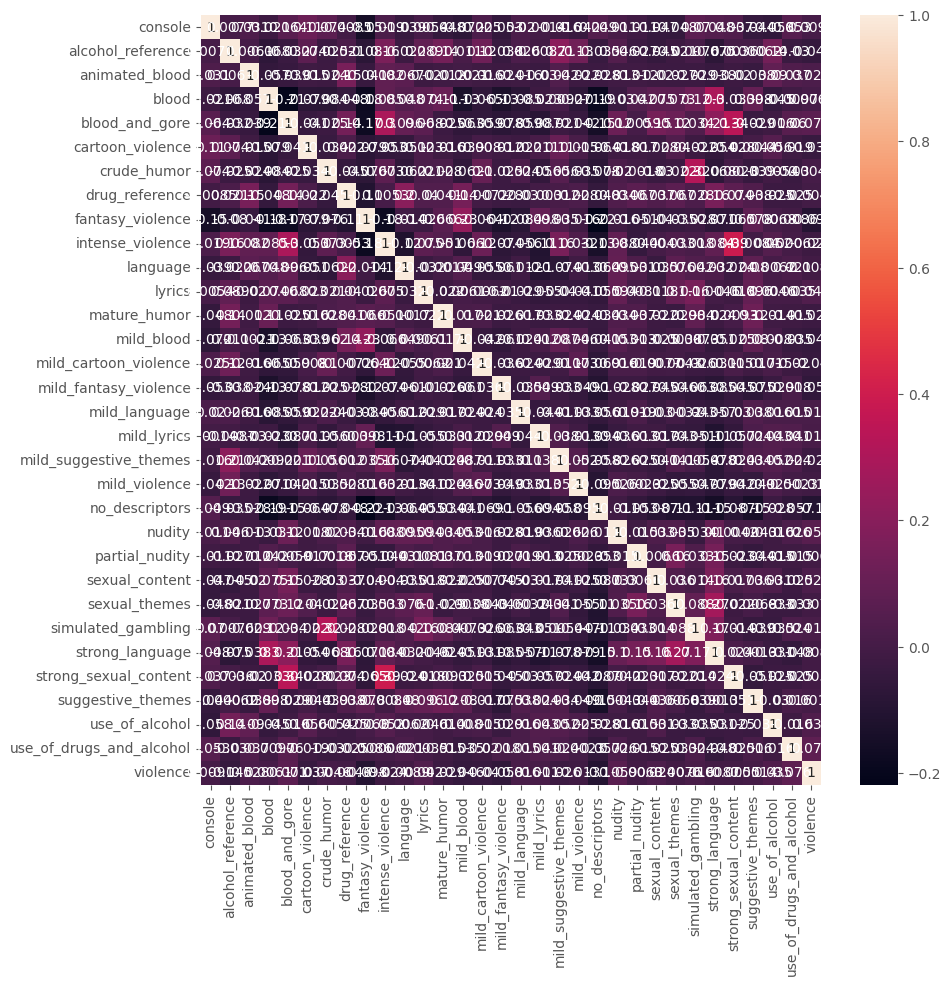

In [54]:
plt.figure(figsize=(10, 10))
sns.heatmap(train.drop(columns="esrb_rating").corr(), annot=True)
plt.show()

Divided into x and y

In [55]:
train_x = train.drop(columns="esrb_rating")
train_y = train.esrb_rating

val_x = val.drop(columns="esrb_rating")
val_y = val.esrb_rating

<h1>Important features from Random Forest Classifier</h1>

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


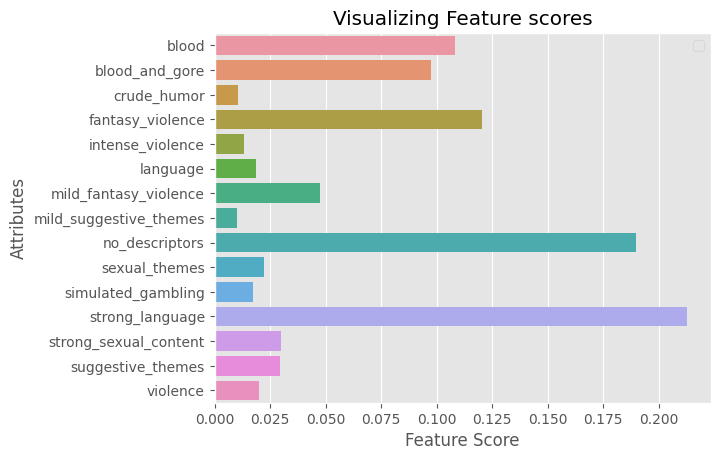

blood                     0.108237
blood_and_gore            0.097501
crude_humor               0.010406
fantasy_violence          0.120225
intense_violence          0.013195
language                  0.018603
mild_fantasy_violence     0.047645
mild_suggestive_themes    0.010220
no_descriptors            0.189720
sexual_themes             0.022160
simulated_gambling        0.017434
strong_language           0.212792
strong_sexual_content     0.029815
suggestive_themes         0.029249
violence                  0.020014
dtype: float64

In [56]:
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1, criterion="gini").fit(train_x, train_y)
feature_imp = pd.Series(model.feature_importances_,index=train_x.columns)
feature_imp = feature_imp[feature_imp > 0.01]

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Score')
plt.ylabel('Attributes')
plt.title("Visualizing Feature scores")
plt.legend()
plt.show()

feature_imp

In [57]:
train = train.drop(columns=feature_imp.index)
train.head()
train.columns

Index(['console', 'alcohol_reference', 'animated_blood', 'cartoon_violence',
       'drug_reference', 'lyrics', 'mature_humor', 'mild_blood',
       'mild_cartoon_violence', 'mild_language', 'mild_lyrics',
       'mild_violence', 'nudity', 'partial_nudity', 'sexual_content',
       'use_of_alcohol', 'use_of_drugs_and_alcohol', 'esrb_rating'],
      dtype='object')

<AxesSubplot:>

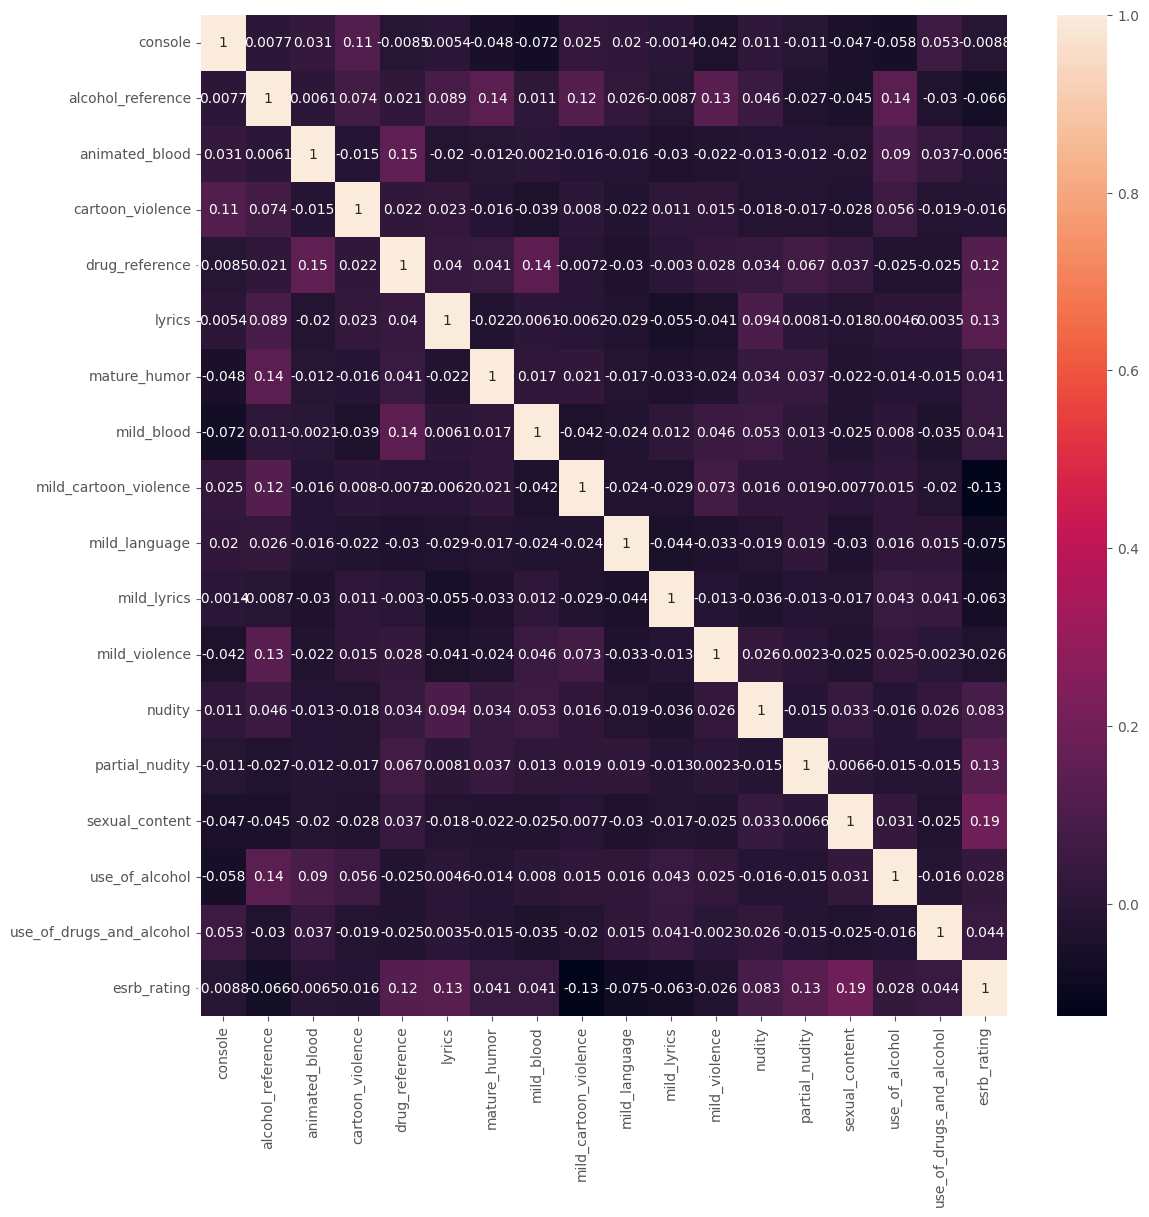

In [61]:
plt.figure(figsize=(13, 13))
sns.heatmap(train.corr(), annot=True)